In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as time
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [4]:
databird=pd.read_csv("https://courses.edx.org/assets/courseware/v1/6184eb0f87c7b58db1a5c336e436ed09/asset-v1:HarvardX+PH526x+2T2021+type@asset+block/bird_tracking.csv")

In [6]:
date_str=databird.date_time
timestamp=[]
for k in range(len(databird.date_time)):
  timestamp.append(time.datetime.strptime(date_str[k][:-3], "%Y-%m-%d %H:%M:%S" ))

In [7]:
databird["Timestamp"]=pd.Series(timestamp, index=databird.index)

In [8]:
proj=ccrs.Mercator()

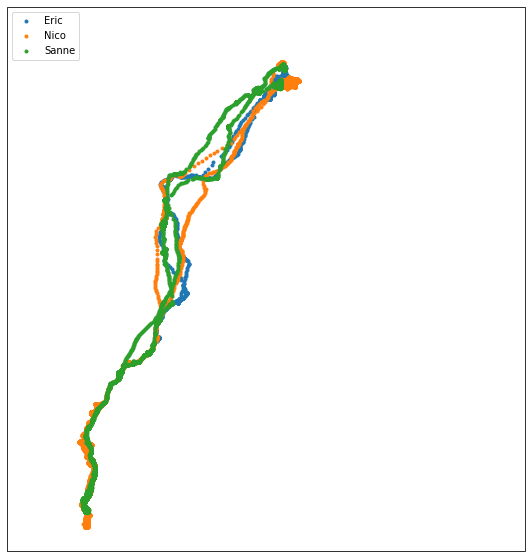

In [13]:
plt.figure(figsize=(10,10))
ax=plt.axes(projection=proj)
ax.set_extent((-25.0,28.0,52.0,10.0))
bird_names= databird.bird_name.unique()


for name in bird_names:
  ix=databird["bird_name"]==name
  y,x=databird.latitude[ix], databird.longitude[ix]
  ax.plot(x,y,".", transform=ccrs.Geodetic(),label=name)

plt.legend(loc="upper left")

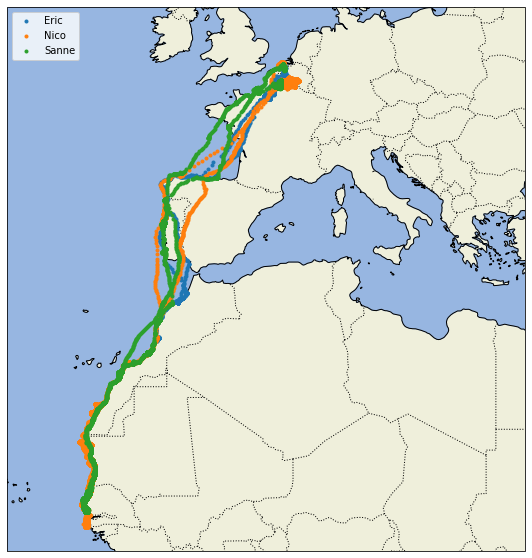

In [17]:
plt.figure(figsize=(10,10))
ax=plt.axes(projection=proj)
ax.set_extent((-25.0,28.0,52.0,10.0))
bird_names= databird.bird_name.unique()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")



for name in bird_names:
  ix=databird["bird_name"]==name
  y,x=databird.latitude[ix], databird.longitude[ix]
  ax.plot(x,y,".", transform=ccrs.Geodetic(),label=name)

plt.legend(loc="upper left")